In [2]:
import sys
sys.path.append('../')

In [3]:
from src.evaluation.zero_shot_video_retriever import ZeroShotVideoRetriever

rtvr = ZeroShotVideoRetriever()

115 videos embeddings have been loaded from pickle file: ../.cache/video_summary.pkl


In [20]:
rtvr.retrieve_video('people wearing a protective device on head', 5)

torch.Size([1, 512])


(['lsa5PDPgJmI', 'Jgye_cEhfGQ', '-jpEsYBH3g4', 'RLbry-3z8yQ', '_0gn0zQx4_s'],
 ["Darryl gives up his life as a hero and gets a job at McDonald's.",
  'Blankman makes the community a safer place.',
  'Blankman and Kevin try to save Mayor Harris before the bomb goes off.',
  'Blankman and Other Guy attempt to rescue Mr. Stone and Kimberly from Minelli.',
  'The boys escape on bike from Lily, who chases after them on foot.'],
 ['Blankman', 'Blankman', 'Blankman', 'Blankman', 'Good Boys'])

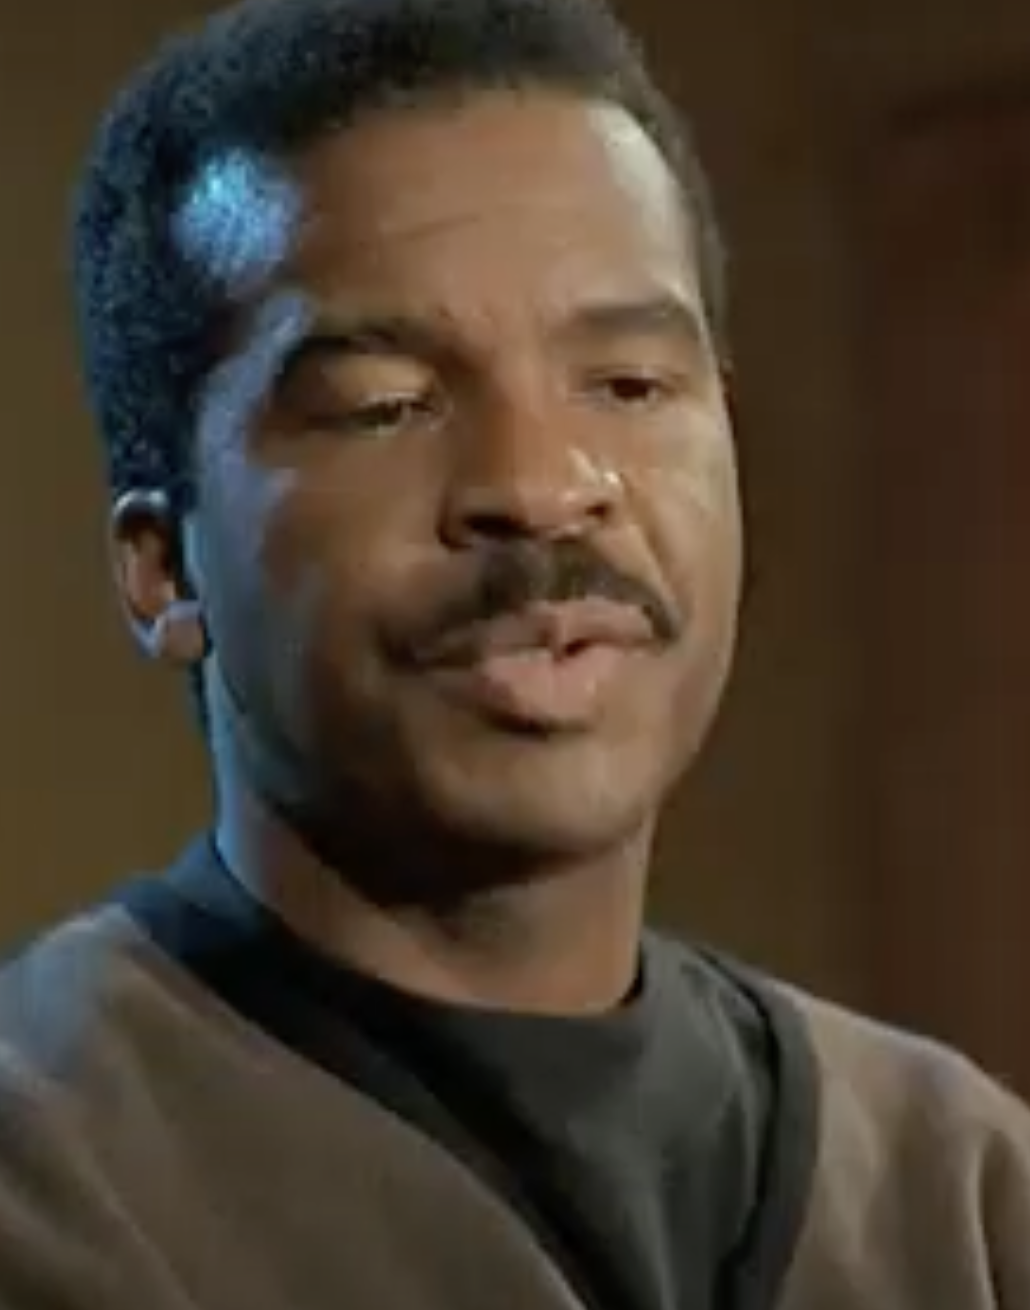

torch.Size([1, 512])


(['-mXoZz1dqMQ', 'lsa5PDPgJmI', 'MGBHNeYbsbg', 'ljAdSzBv0ug', 'sM1I11qUM44'],
 ['Blankman and Other Guy are honored for their heroism.',
  "Darryl gives up his life as a hero and gets a job at McDonald's.",
  "Darryl delivers a woman's baby in an elevator, cementing himself as a true hero.",
  'While trying to stop a bank robbery, Blankman gets taken hostage.',
  'Blankman and Other Guy face off against Minelli and his goons.'],
 ['Blankman', 'Blankman', 'Blankman', 'Blankman', 'Blankman'])

In [21]:
from PIL import Image

image = Image.open('../../img.png')
display(image)

rtvr.retrieve_video_from_image(image, 5)

In [4]:
rtvr.descriptions

['Adonis proposes to his girlfriend, Bianca.',
 'Adonis Johnson and Viktor Drago square off for the Heavyweight Belt.',
 'Blankman and Kevin try to save Mayor Harris before the bomb goes off.',
 'Ivan Drago trains his son, Viktor.',
 'Stukas bomb a British evacuation ship.',
 'Royal Navy Commander Bolton spots "home" in the form of heroic naval and civilian vessels coming for rescue.',
 'Blankman and Other Guy are honored for their heroism.',
 'Blankman and Other Guy face off against Minelli and his goons.',
 'No description available',
 "Dr. Sivana demands Shazam's powers.",
 'Freddy helps Shazam test out his new superpowers.',
 'Shazam stops an armed robbery at a convenient store.',
 'No description available',
 'No description available',
 'Stranded soldiers step out of their lines when dive bomber planes start dropping bombs.',
 'The soldiers begin to succumb to despair.',
 "Darryl gives up his life as a hero and gets a job at McDonald's.",
 'Shazam inducts his family into superher

In [6]:
rtvr.movie_names

['mother!',
 'Good Boys',
 'The Grinch',
 'Downton Abbey',
 'Abominable',
 'The Angry Birds Movie 2',
 'La Cage aux Folles',
 'Abominable',
 'Downton Abbey',
 'The Angry Birds Movie 2',
 'mother!',
 'La Cage aux Folles',
 'The Angry Birds Movie 2',
 'Les Misérables',
 'The Grinch',
 'Abominable',
 'Good Boys',
 'The Grinch',
 'Good Boys',
 'The Angry Birds Movie 2',
 'mother!',
 'mother!',
 'La Cage aux Folles',
 'Les Misérables',
 'Downton Abbey',
 'Les Misérables',
 'Abominable',
 'Abominable',
 'Les Misérables',
 'The Grinch',
 'The Angry Birds Movie 2',
 'Downton Abbey',
 'Downton Abbey',
 'The Grinch',
 'Good Boys',
 'Good Boys',
 'La Cage aux Folles',
 'The Grinch',
 'Les Misérables',
 'Les Misérables',
 'Good Boys',
 'Les Misérables',
 'The Angry Birds Movie 2',
 'The Grinch',
 'Les Misérables',
 'La Cage aux Folles',
 'Abominable',
 'La Cage aux Folles',
 'The Angry Birds Movie 2',
 'Downton Abbey',
 'Good Boys',
 'La Cage aux Folles',
 'Good Boys',
 'Les Misérables',
 'Downton

In [22]:
v = 5
def foo():
    global v
    v = 2
    print(v)

foo()
print(v)

2
2


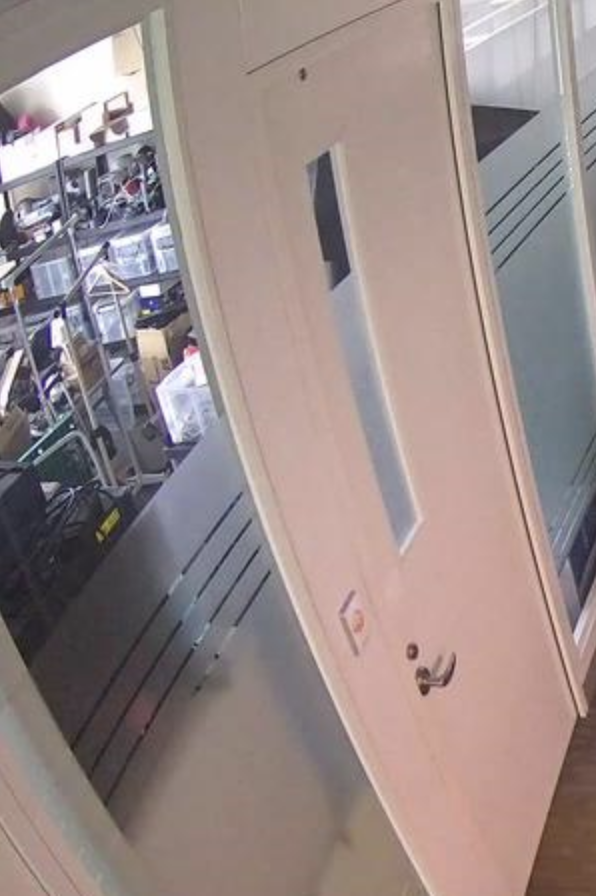

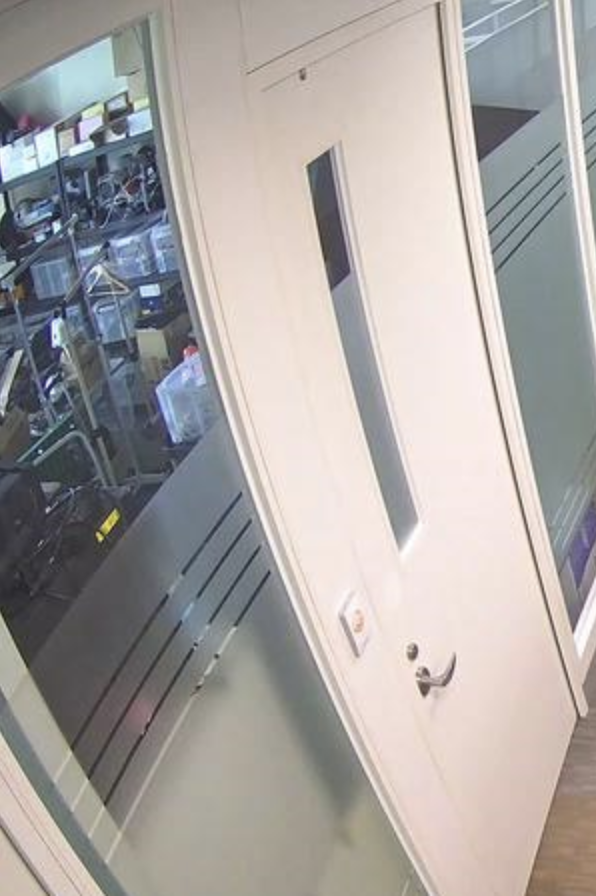

tensor([[90.7500]], device='mps:0', dtype=torch.float16)


In [35]:
import clip
from src import utils
import torch
from PIL import Image

image1 = Image.open('../../test1.png')
display(image1)
image2 = Image.open('../../test2.png')
display(image2)

model , clip_preprocess = clip.load('ViT-B/32', utils.device)
image_input1 = clip_preprocess(image1).unsqueeze(0).to(utils.device)
image_input2 = clip_preprocess(image2).unsqueeze(0).to(utils.device)

with torch.no_grad():
    image_features1 = model.encode_image(image_input1)
    image_features2 = model.encode_image(image_input2)

image_features1 /= image_features1.norm(dim=-1, keepdim=True)
image_features2 /= image_features2.norm(dim=-1, keepdim=True)

similarity = (100.0 * image_features1 @ image_features2.T)
print(similarity)